# Relatório Atividade 3: Treinamento MLP

## Dataset escolhido:

O dataset escolhido para o treinamento foi o Wine Dataset disponível na biblioteca Scikit-learn, que apresenta dados relacionados a três cultivares de vinhos, classificados a partir de 13 features (alcohol, malic_acid, ash, etc), contendo 178 amostras.

In [ ]:
#Importar bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importar e carregar o dataset
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
#Criar dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Estatísticas do Problema e Justificativa da Escolha

O Wine Dataset foi escolhido pois possui apenas variáveis numéricas, o que facilita o uso do MLP, além de apresentar classes balanceadas, padrões claros nas distribuições e correlações. Por ser um dataset pequeno, ele exige pouca capacidade de processamento, permitindo testar rapidamente diferentes técnicas de análise exploratória e classificação de forma eficiente e didática.

In [14]:
#Explorar o dataset
print("\n Wine Dataset:")
print(f"   - Amostras: {df.shape[0]}")
print(f"   - Features: {df.shape[1] - 1}") 
print(f"   - Classes: {df['target'].nunique()}")

print("\n Distribuição das classes:")
print(df["target"].value_counts())

print("\n Estatísticas descritivas:")
display(df.describe())


 Wine Dataset:
   - Amostras: 178
   - Features: 13
   - Classes: 3

 Distribuição das classes:
target
1    71
0    59
2    48
Name: count, dtype: int64

 Estatísticas descritivas:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### KDE e Boxplots por variável

Foram gerados gráficos KDE e boxplots para cada uma das 13 variáveis, permitindo visualizar a distribuição das variáveis por classe e as diferenças e sobreposições entre os grupos. Já os boxplots destacam a mediana, dispersão e possíveis outliers de cada feature.

Observa-se que algumas features apresentam distribuições mais distintas entre as classes: como flavanoids, proline e color_intensity, facilitando a separação entre os grupos. Outras, mostram maior sobreposição, como ash e magnesium.



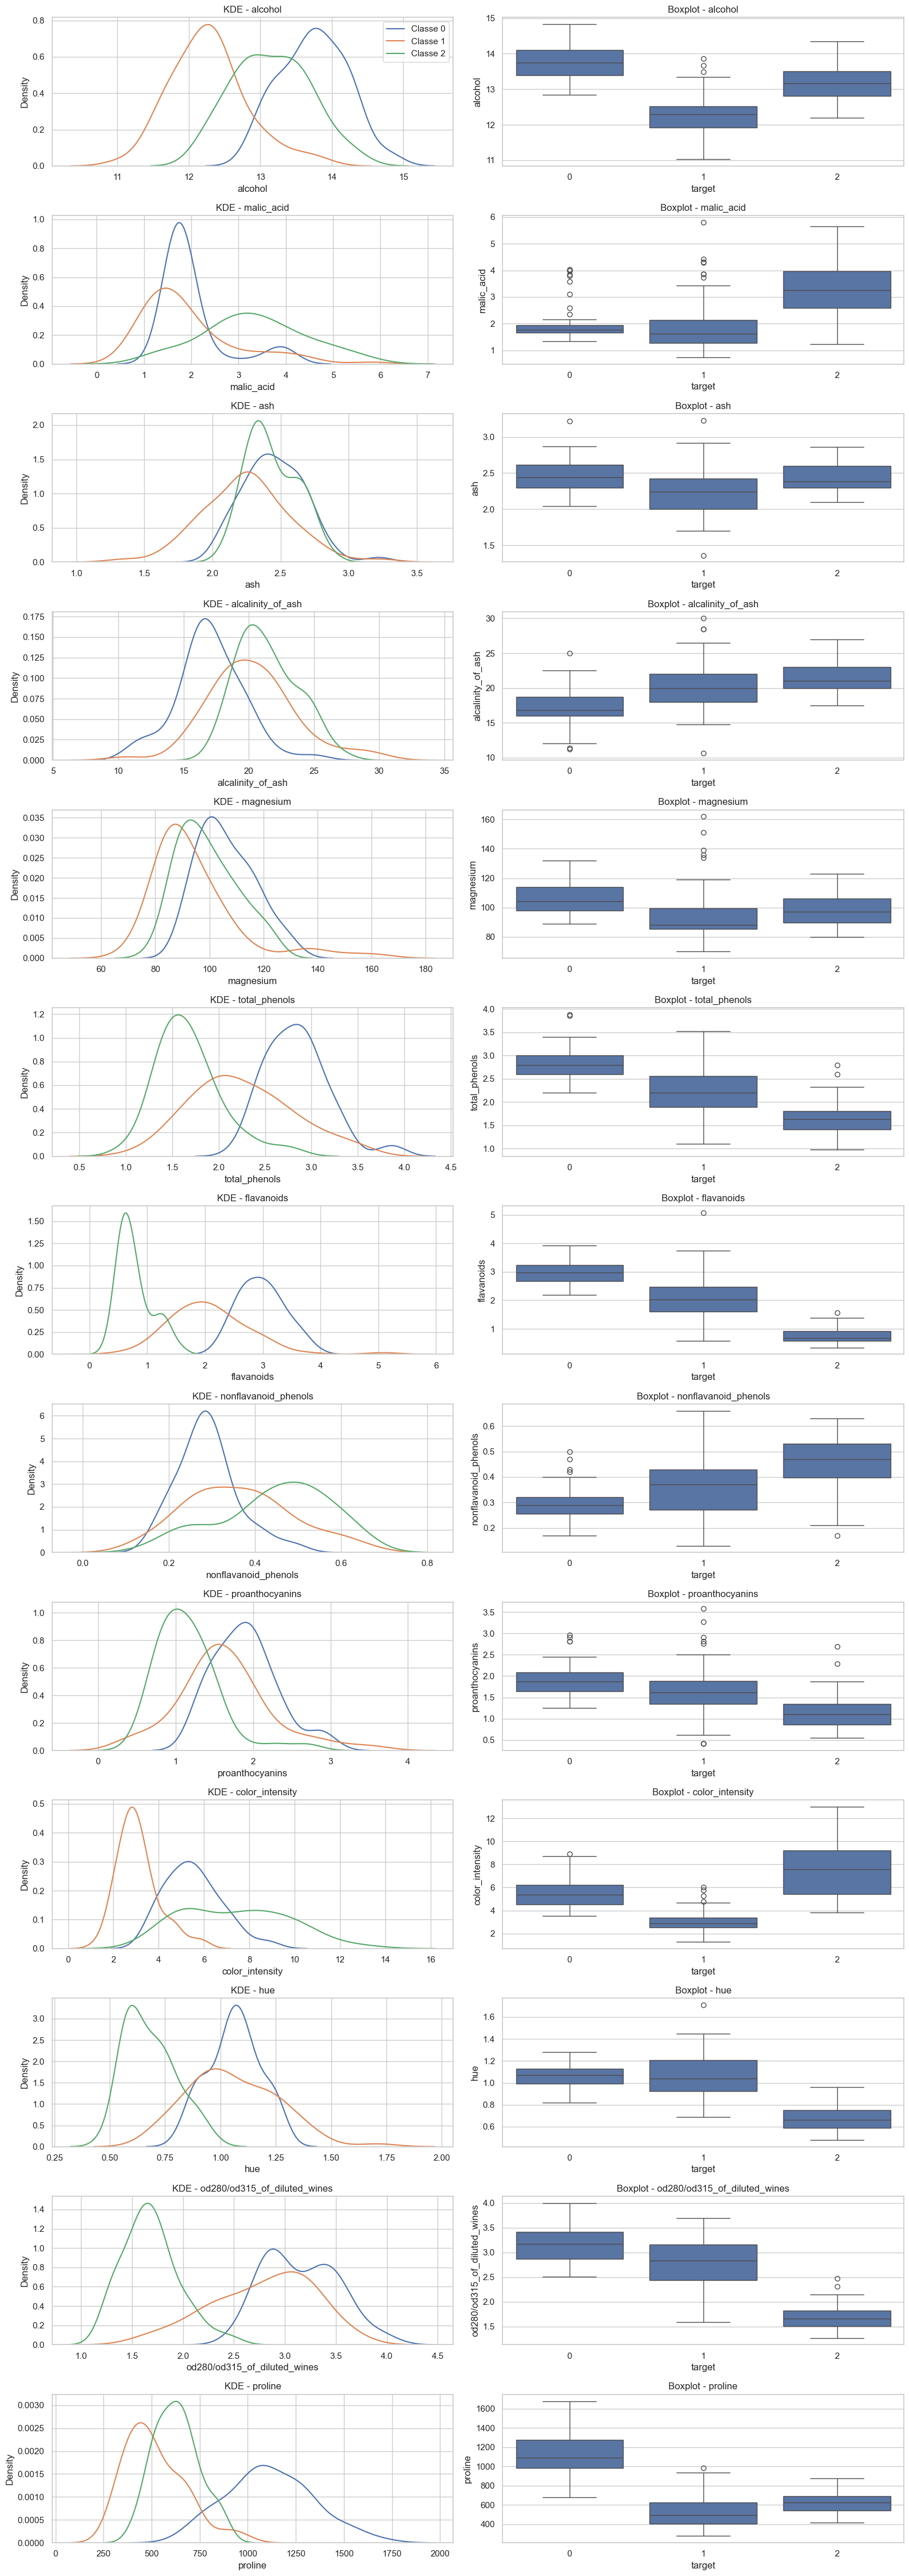

In [ ]:
#KDE e boxplot das features
features = wine.feature_names
n = len(features)

cols = 2        
rows = n        

plt.figure(figsize=(16, 45)) 

for i, feature in enumerate(features):

    plt.subplot(rows, cols, i*2 + 1)
    for c in sorted(df["target"].unique()):
        sns.kdeplot(
            df[df["target"] == c][feature],
            label=f"Classe {c}",
            fill=False
        )
    plt.title(f"KDE - {feature}")
    if i == 0:
        plt.legend()

    plt.subplot(rows, cols, i*2 + 2)
    sns.boxplot(data=df, x="target", y=feature)
    plt.title(f"Boxplot - {feature}")

plt.tight_layout()
plt.show()


### Matriz de Correlação

Por meio da matriz de correlação, é possível identificar pares de variáveis com relações fortes, como flavanoids e od280/od315_of_diluted_wines, total_phenols e flavanoids e alcohol e color_intensity.

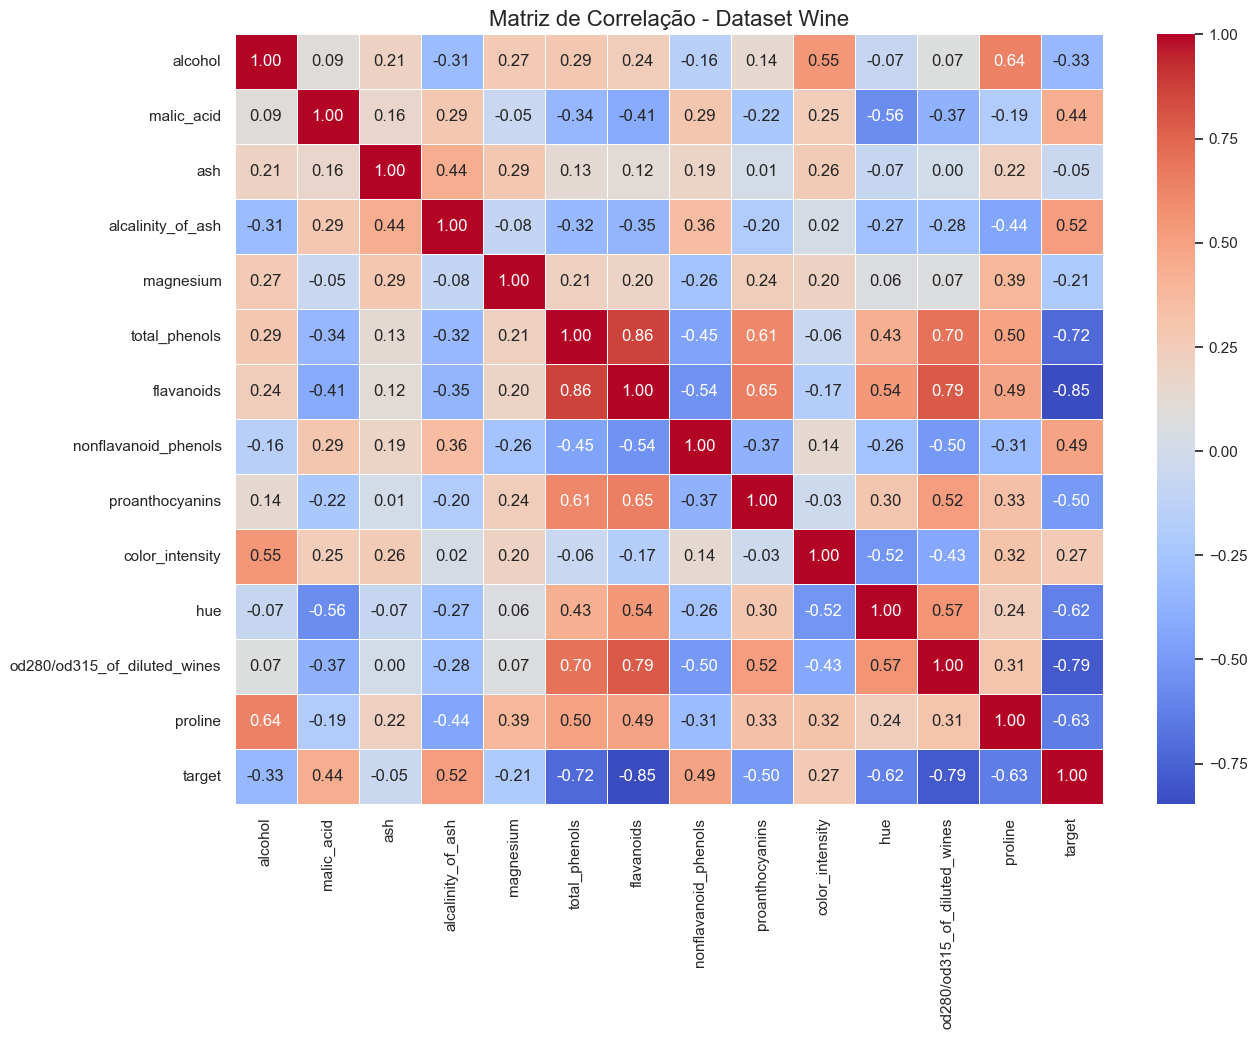

In [21]:
# Matriz de correlação
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,         # mostra os valores
    cmap="coolwarm",    # escala de cores
    fmt=".2f",          # casas decimais
    linewidths=0.5
)
plt.title("Matriz de Correlação - Dataset Wine", fontsize=16)
plt.show()

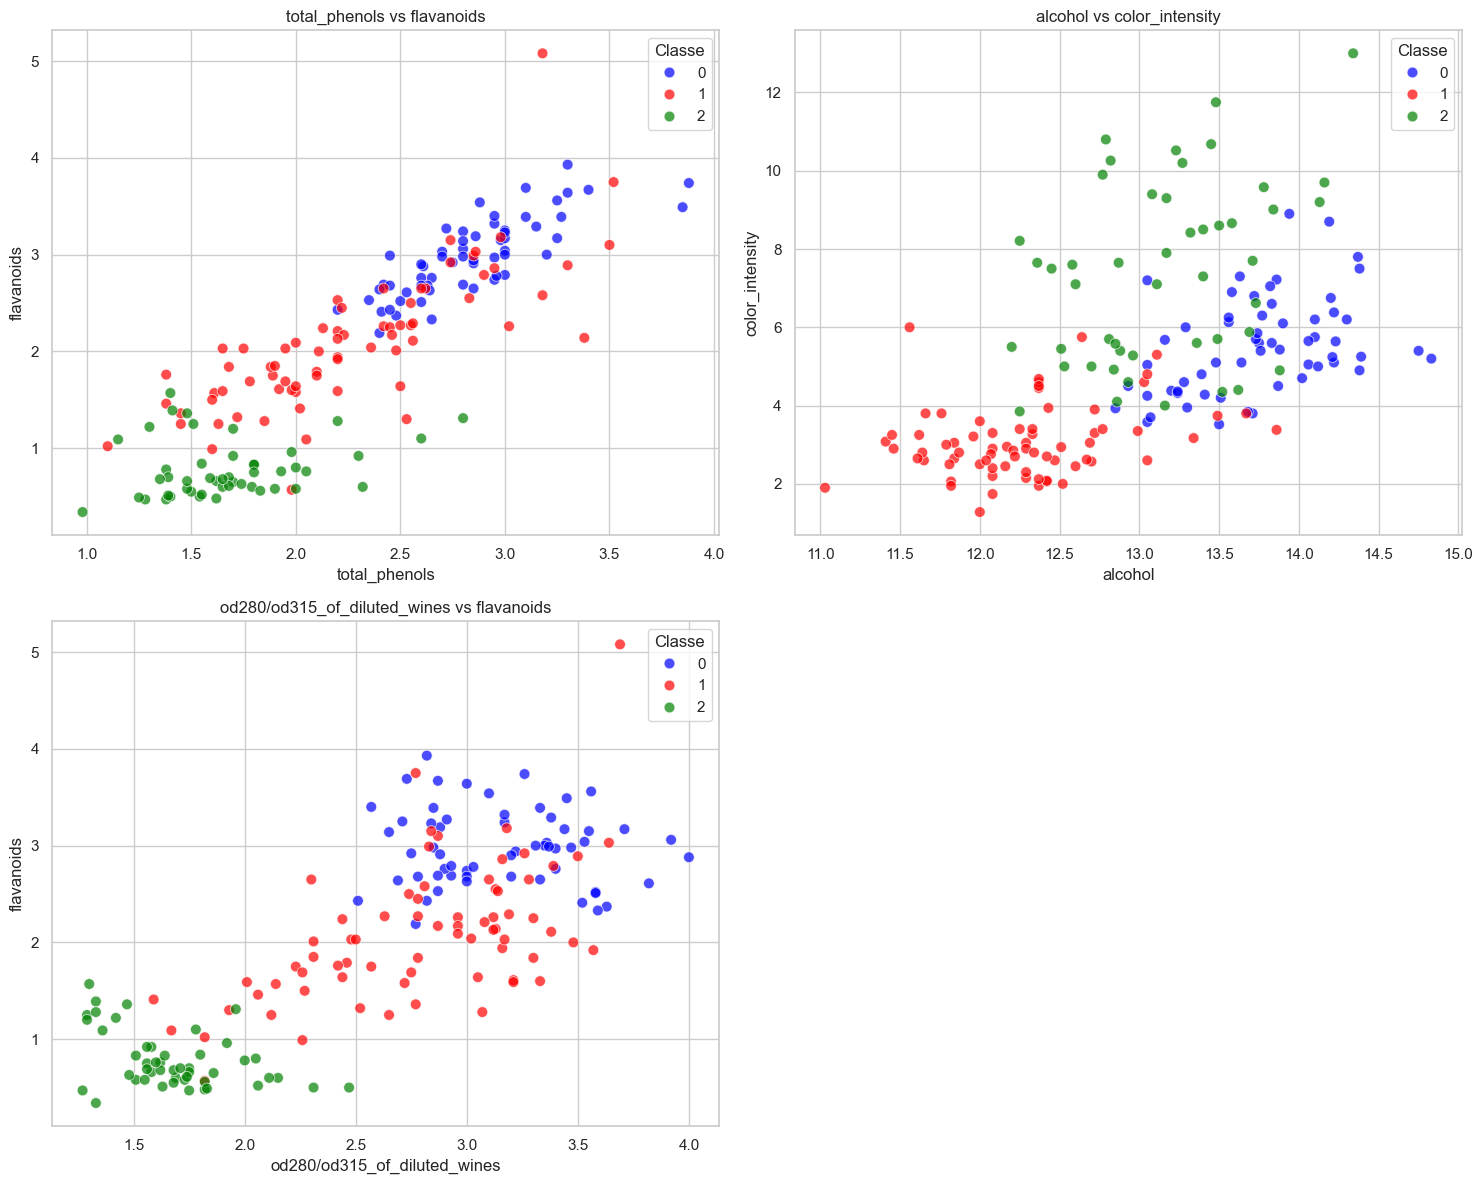

In [45]:
palette_colors = {0: 'blue', 1: 'red', 2: 'green'}

pairs = [
    ('total_phenols', 'flavanoids'),
    ('alcohol', 'color_intensity'),
    ('od280/od315_of_diluted_wines', 'flavanoids')
]

plt.figure(figsize=(15, 12))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue='target',
        palette=palette_colors,
        s=60,
        alpha=0.7
    )
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title="Classe")

plt.tight_layout()
plt.show()

## Pré-processamento 

A metodologia consistiu inicialmente na divisão dos dados em treino (80%) e teste (20%) usando train_test_split com stratificação. Em seguida, as features foram padronizadas com StandardScaler. 

In [25]:
#sikit-learn para pré-processamento

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #padroniza features (média 0, desvio padrão 1)

In [26]:
#separar os dados de treinamento (80%) e os dados de teste (20%)

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
print(f" Treino: {X_train.shape[0]} amostras")
print(f" Teste: {X_test.shape[0]} amostras")

 Treino: 142 amostras
 Teste: 36 amostras


In [29]:
# Padronização das features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
print("\n Estatísticas após padronização (Treino):")
print(f"Média por feature: {X_train.mean(axis=0).round(2)}")
print(f"Desvio padrão por feature: {X_train.std(axis=0).round(2)}")


 Estatísticas após padronização (Treino):
Média por feature: [ 0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.]
Desvio padrão por feature: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Implemetação MLP

Foi utilizado o MLPClassifier, que é a implementação do Scikit-Learn para redes neurais Multi-Layer Perceptron.

Hiperparâmetros utilizados:

- hidden_layer_sizes=(10,) — Define a quantidade de neurônios da camada oculta (inicialmente = 10)

- activation='logistic' — Função de ativação sigmoide.

- solver='adam' — solucionador para otimização de pesos.

- learning_rate_init=0.01 — taxa inicial de aprendizagem.

- max_iter=500 — limita o número máximo de iterações do processo de otimização.

- random_state=42 — Garante reprodutibilidade dos resultados.

In [31]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Criando o MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),   # 1 camada oculta com 10 neurônios
    activation='logistic',      # função de ativação da camada oculta, sigmoidal
    solver='adam',              # algoritmo de otimização
    learning_rate_init=0.01,    # taxa de aprendizagem
    max_iter=500,               # número máximo de iterações
    random_state=42             # garante reprodutibilidade
)

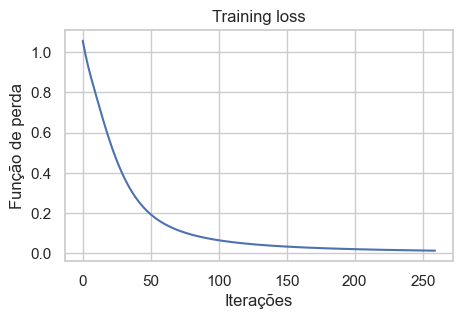

In [37]:
#Curva de perda (equivalente a history.history['loss'])

plt.figure(figsize=(5,3))
plt.plot(mlp.loss_curve_)
plt.title('Training loss')
plt.xlabel("Iterações")
plt.ylabel("Função de perda")
plt.show()


In [35]:
# Previsões no conjunto de teste
y_pred = mlp.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Avaliação do modelo

accuracy = accuracy_score(y_test, mlp.predict(X_test))
print(" Accuracy no conjunto de teste: %.2f%%" % (accuracy*100))

print("\n Classification Report:\n", classification_report(y_test, mlp.predict(X_test)))


 Accuracy no conjunto de teste: 97.22%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [42]:
print("Número de iterações realizadas:", mlp.n_iter_)

Número de iterações realizadas: 260


Acurácia com 20 neurônios: 97.22%

Classification Report (20 neurônios):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Número de iterações até convergir: 208


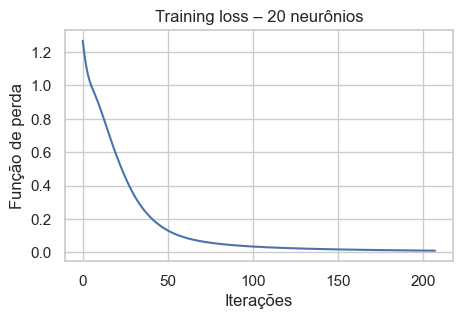

In [48]:
# MLP com 20 neurônios (nova arquitetura)

mlp_20 = MLPClassifier(
    hidden_layer_sizes=(20,),
    activation='logistic',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=500,
    random_state=42
)

# Treinamento
mlp_20.fit(X_train, y_train)

# Avaliação
y_pred_20 = mlp_20.predict(X_test)
accuracy_20 = accuracy_score(y_test, y_pred_20)

print("Acurácia com 20 neurônios: %.2f%%" % (accuracy_20 * 100))
print("\nClassification Report (20 neurônios):\n")
print(classification_report(y_test, y_pred_20))

print("Número de iterações até convergir:", mlp_20.n_iter_)

# Curva de perda
plt.figure(figsize=(5,3))
plt.plot(mlp_20.loss_curve_)
plt.title('Training loss – 20 neurônios')
plt.xlabel("Iterações")
plt.ylabel("Função de perda")
plt.show()


### Conclusões

- O MLP apresentou boa acurácia no conjunto de teste, mostrando-se adequado para a classificação das três classes do dataset Wine.

- As análises exploratórias revelaram boa separação entre as variáveis, especialmente flavanoids, proline e od280/od315, o que facilitou o aprendizado do modelo.

- A padronização das features foi essencial, pois o MLP é sensível à escala dos dados.

- Vantagens: capacidade de capturar relações não lineares, baixo custo computacional no Wine e facilidade de ajuste via Scikit-Learn.

- Limitações: necessidade de ajuste de hiperparâmetros, possível dificuldade de convergência e menor interpretabilidade em comparação a modelos lineares.

- O teste com diferentes arquiteturas (10 e 20 neurônios) resultou em desempenho idêntico, indicando que o dataset é simples e que a rede com 10 neurônios já possuía capacidade suficiente para separar as classes.